In [2]:
import glob, os
import zipfile
from read_roi import read_roi_zip 
import SimpleITK as sitk
import numpy as np
from collections import OrderedDict

from  scipy import ndimage

import matplotlib.pyplot as plt

from PIL import Image, ImageDraw 
from PIL import ImagePath
import cv2

import pandas as pd
def win_scale(data, wl, ww, dtype, out_range):
    """
    Scale pixel intensity data using specified window level, width, and intensity range.
    """
    
    data_new = np.empty(data.shape, dtype=np.double)
    data_new.fill(out_range[1]-1)
    
    data_new[data <= (wl-ww/2.0)] = out_range[0]
    
    data_new[(data>(wl-ww/2.0))&(data<=(wl+ww/2.0))] = ((data[(data>(wl-ww/2.0))&(data<=(wl+ww/2.0))]-(wl-0.5))/(ww-1.0)+0.5)*(out_range[1]-out_range[0])+out_range[0]
    
    data_new[data > (wl+ww/2.0)] = out_range[1]-1
    
    return data_new.astype(dtype)

In [3]:
abroiPath= '../segment/01013843/abnormal.zip'
nroiPath='../../segment/01013843/normal.zip'

In [4]:
abr = read_roi_zip(abroiPath)

In [5]:
od= OrderedDict(abr)

In [21]:
help(OrderedDict)

Help on class OrderedDict in module collections:

class OrderedDict(builtins.dict)
 |  Dictionary that remembers insertion order
 |  
 |  Method resolution order:
 |      OrderedDict
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __reduce__(...)
 |      Return state information for pickling
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __reversed__(..

In [6]:
odKey = list(od.keys())
print(odKey[0], odKey[0].split('-')[0])

0118-0258-0351 0118


In [7]:
match_num=[]
for mn in range(len(odKey)):
    match_num.append(odKey[mn].split('-')[0])

In [8]:
roi_x = abr[odKey[0]]['x']
roi_y = abr[odKey[0]]['y']

xyList = []
for xy in range(len(roi_x)):
    xyList.append((roi_x[xy],roi_y[xy]))

In [22]:
print(xyList)

[(351, 254), (350, 254), (349, 254), (348, 254), (348, 255), (347, 255), (347, 256), (346, 256), (346, 257), (346, 258), (346, 259), (346, 260), (346, 261), (347, 261), (347, 262), (348, 263), (349, 263), (350, 263), (351, 263), (352, 263), (353, 263), (354, 263), (354, 262), (355, 262), (355, 261), (355, 260), (356, 260), (356, 259), (356, 258), (356, 257), (355, 257), (355, 256), (354, 256), (354, 255), (353, 255), (353, 254), (352, 254), (351, 254), (350, 254)]


In [9]:
nplist= np.array(xyList)
# print(nplist)

[[351 254]
 [350 254]
 [349 254]
 [348 254]
 [348 255]
 [347 255]
 [347 256]
 [346 256]
 [346 257]
 [346 258]
 [346 259]
 [346 260]
 [346 261]
 [347 261]
 [347 262]
 [348 263]
 [349 263]
 [350 263]
 [351 263]
 [352 263]
 [353 263]
 [354 263]
 [354 262]
 [355 262]
 [355 261]
 [355 260]
 [356 260]
 [356 259]
 [356 258]
 [356 257]
 [355 257]
 [355 256]
 [354 256]
 [354 255]
 [353 255]
 [353 254]
 [352 254]
 [351 254]
 [350 254]]


In [10]:
testList = sorted(glob.glob('../test_dcm/*'))
p_num= []
for pn in range(len(testList)):
    p_num.append(testList[pn][testList[pn].rindex('/')+1:])
    
print(testList[0], p_num[0])


../test_dcm/01013843 01013843


In [11]:
print(type(p_num[0]), type(match_num[0]))

<class 'str'> <class 'str'>


In [18]:
help(Image.open)

Help on function open in module PIL.Image:

open(fp, mode='r')
    Opens and identifies the given image file.
    
    This is a lazy operation; this function identifies the file, but
    the file remains open and the actual image data is not read from
    the file until you try to process the data (or call the
    :py:meth:`~PIL.Image.Image.load` method).  See
    :py:func:`~PIL.Image.new`. See :ref:`file-handling`.
    
    :param fp: A filename (string), pathlib.Path object or a file object.
       The file object must implement :py:meth:`~file.read`,
       :py:meth:`~file.seek`, and :py:meth:`~file.tell` methods,
       and be opened in binary mode.
    :param mode: The mode.  If given, this argument must be "r".
    :returns: An :py:class:`~PIL.Image.Image` object.
    :exception FileNotFoundError: If the file cannot be found.
    :exception PIL.UnidentifiedImageError: If the image cannot be opened and
       identified.
    :exception ValueError: If the ``mode`` is not "r", or i

In [24]:
import cv2

In [12]:
help(cv2.rectangle)

Help on built-in function rectangle:

rectangle(...)
    rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
    .   @brief Draws a simple, thick, or filled up-right rectangle.
    .   
    .   The function cv::rectangle draws a rectangle outline or a filled rectangle whose two opposite corners
    .   are pt1 and pt2.
    .   
    .   @param img Image.
    .   @param pt1 Vertex of the rectangle.
    .   @param pt2 Vertex of the rectangle opposite to pt1 .
    .   @param color Rectangle color or brightness (grayscale image).
    .   @param thickness Thickness of lines that make up the rectangle. Negative values, like #FILLED,
    .   mean that the function has to draw a filled rectangle.
    .   @param lineType Type of the line. See #LineTypes
    .   @param shift Number of fractional bits in the point coordinates.



In [37]:
print(img_array.shape)

(512, 512)


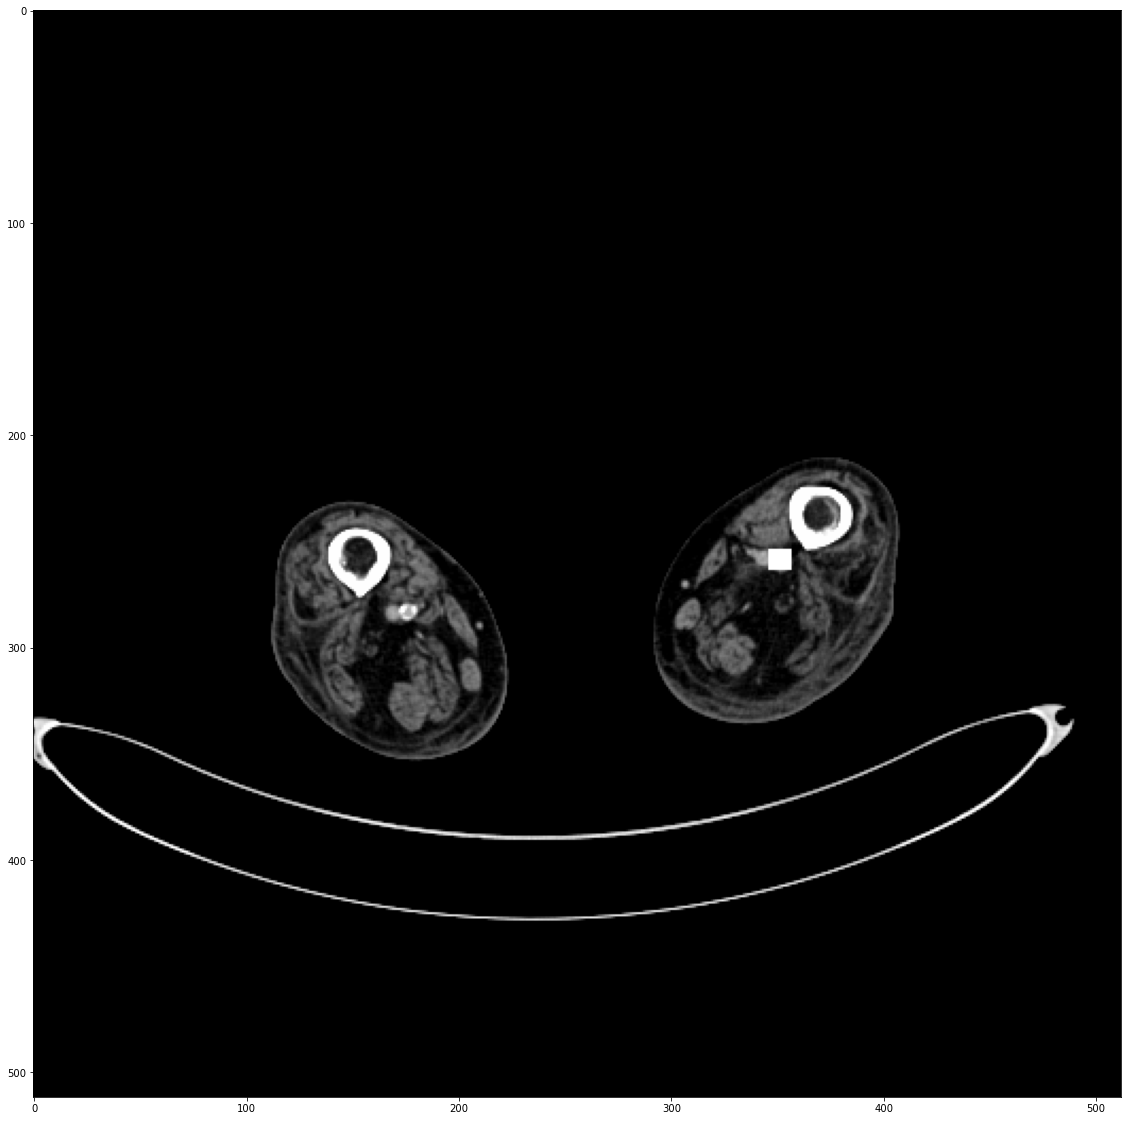

In [80]:
dcm_dcm = sitk.ReadImage(testList[0]+'/'+p_num[0]+'_'+match_num[0]+'.dcm')
dcm_img = sitk.GetArrayFromImage(dcm_dcm)[0]
img_array = win_scale(dcm_img, 80, 380, np.uint8, (0, 255))
img_test= img_array.copy()
# print(dcm_img.dtype)
# im = Image.open(dcm_img)
# img1 = ImageDraw.Draw(im)
# img1.polygon(xyList, fill=1, outline=None)  
# img = hole[mn]
#         print(int(mn))
back = np.zeros((512,512,3), dtype=np.uint8)
backR = np.zeros((512,512,1), dtype=np.uint8)
gray = np.uint8(img_array)
img1 = gray.copy()

# draw = cv2.polylines(back, [nplist], True, (0,255,0), 2)
drawRec = cv2.rectangle(img_array, (min(roi_x), min(roi_y)), (max(roi_x), max(roi_y)), (255,255,255), -1 )
# cv2.fillPoly(drawRec, (min(roi_x), min(roi_y)), (max(roi_x), max(roi_y)), (255,255,255))
plt.figure(figsize=(20,20))
plt.imshow(drawRec, cmap='gray')
# plt.imshow(drawRec, cmap='gray')
plt.show()
# _, contours, hierachy = cv2.findContours(img1, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)



In [60]:
aaa = np.zeros((max(roi_x)-min(roi_x), max(roi_y)-min(roi_y),1), dtype= np.uint8)
aaa[:,:,0] = img_array[min(roi_x):max(roi_x), min(roi_y):max(roi_y)]

In [31]:
img_mul = img_array * backR

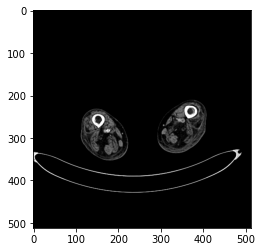

In [43]:
plt.imshow(img_array, cmap='gray')

In [47]:
print([min(roi_x),max(roi_x), min(roi_y),max(roi_y)])

[346, 356, 254, 263]


In [73]:
img_test.shape

(512, 512)

In [48]:
img_array = win_scale(dcm_img, 80, 380, np.uint8, (0, 255))

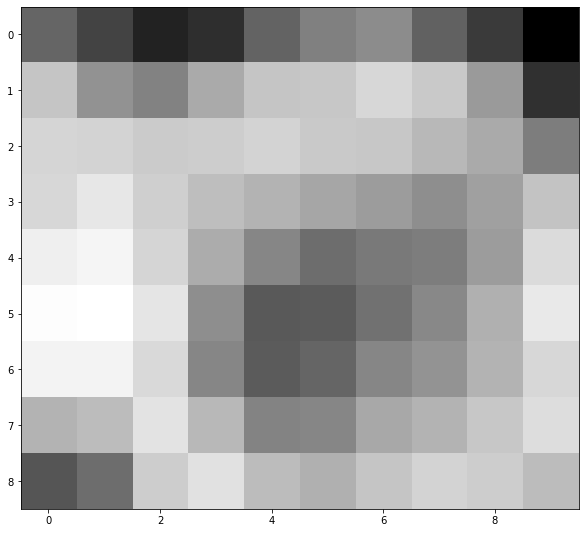

In [84]:
plt.figure(figsize=(10,10))
bbb = np.zeros((max(roi_y)-min(roi_y),max(roi_x)-min(roi_x),1), dtype= np.uint8)
bbb[:,:,0] = img_test[min(roi_y):max(roi_y),min(roi_x):max(roi_x)]
# plt.imshow(img_array[min(roi_y):max(roi_y),min(roi_x):max(roi_x)], cmap='gray')
# plt.imshow(img_array[346:356, 254:263], cmap='gray')
# plt.imshow(img_test[min(roi_x):max(roi_x),min(roi_y):max(roi_y)], cmap='gray')
# plt.imshow(img_test[min(roi_y):max(roi_y),min(roi_x):max(roi_x)], cmap='gray')
plt.imshow(bbb, cmap='gray')

In [ ]:
np.zeors()

In [ ]:
T1_WINDOW_LEVEL= (380,80)
dcm_list=sorted(glob.glob('../../local/data/dvt/01013843/*.dcm'))

img_T1 = sitk.ReadImage(dcm_list)
img_T1_255 = sitk.Cast(sitk.IntensityWindowing(img_T1, 
                                               windowMinimum=T1_WINDOW_LEVEL[1]-T1_WINDOW_LEVEL[0]/2.0, 
                                               windowMaximum=T1_WINDOW_LEVEL[1]+T1_WINDOW_LEVEL[0]/2.0), 
                       sitk.sitkUInt8)

point_acquisition_interface = gui.PointDataAquisition(img_T1, window_level=(380,80))

#preselected seed point in the left ventricle  
point_acquisition_interface.set_point_indexes([(315,205,67)])

initial_seed_point_indexes = point_acquisition_interface.get_point_indexes()

In [2]:
roiPath = '../segment/'
dcmList = sorted(glob.glob('../test_dcm/*'))
p_num= []

for pn in range(len(dcmList)):
    p_num.append(dcmList[pn][dcmList[pn].rindex('/')+1:])



In [33]:
abr = read_roi_zip(abroiPath)
abn_odKey = list(OrderedDict(abr).keys())
print(abn_odKey[0].split('-')[0])
print(int(abn_odKey[0].split('-')[0]))

0118
118


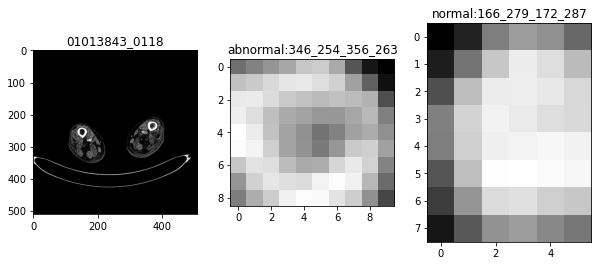

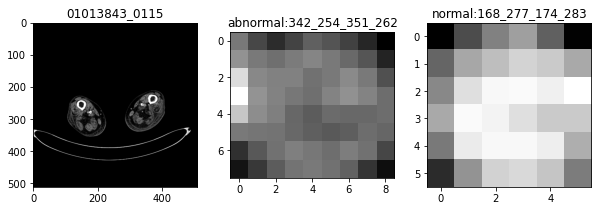

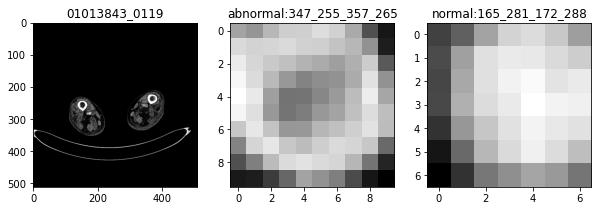

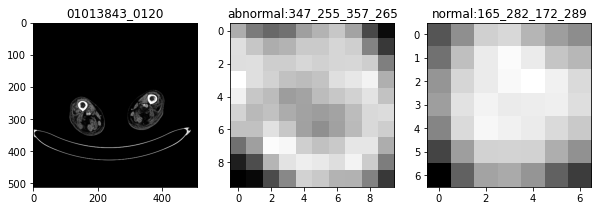

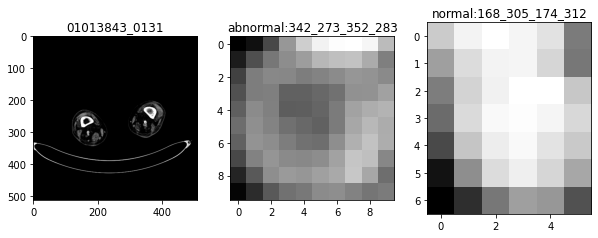

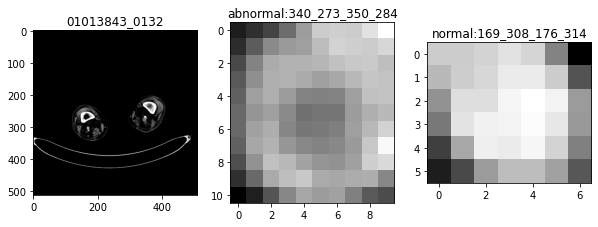

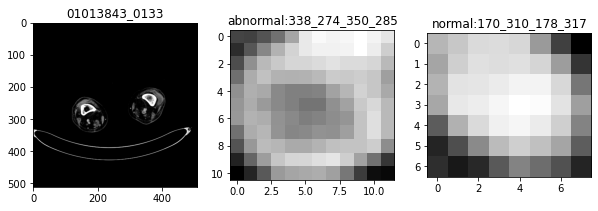

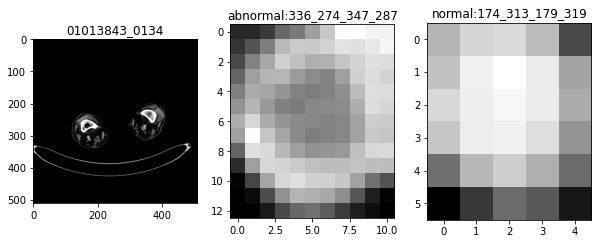

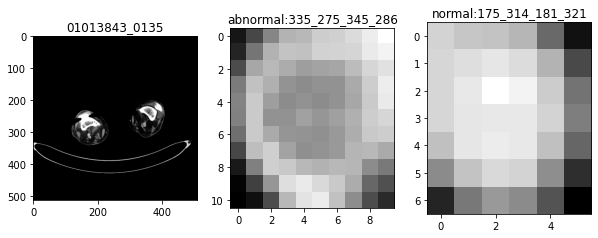

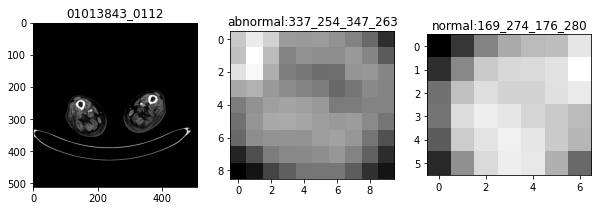

In [37]:
###############주간보고 캡쳐
# for whl in range(len(p_num)):
for whl in range(1):
    
    abroiPath= '../segment/'+ p_num[whl]+'/abnormal.zip'
    nroiPath='../segment/'+ p_num[whl]+'/normal.zip'

    abr = read_roi_zip(abroiPath)
    nr =  read_roi_zip(nroiPath)

    abn_odKey = list(OrderedDict(abr).keys())
    n_odKey = list(OrderedDict(nr).keys())


    for ak in range(len(abn_odKey)):
        
        ab_x_min = min(abr[abn_odKey[ak]]['x'])
        ab_y_min = min(abr[abn_odKey[ak]]['y'])
        ab_x_max = max(abr[abn_odKey[ak]]['x'])
        ab_y_max = max(abr[abn_odKey[ak]]['y'])
# 
        dcm_dcm = sitk.ReadImage(dcmList[whl]+'/'+p_num[whl]+'_'+'0'+str(int(abn_odKey[ak].split('-')[0])-1)+'.dcm')
        dcm_img = sitk.GetArrayFromImage(dcm_dcm)[0]
        img_array = win_scale(dcm_img, 80, 380, np.uint8, (0, 255))



        bbb = np.zeros((ab_y_max-ab_y_min, ab_x_max-ab_x_min,1), dtype= np.uint8)
        bbb[:,:,0] = img_array[ab_y_min:ab_y_max, ab_x_min:ab_x_max]
#         bbb = np.zeros((ab_x_max-ab_x_min, ab_y_max-ab_y_min, 1), dtype= np.uint8)
#         bbb[:,:,0] = img_array[ab_x_min:ab_x_max,ab_y_min:ab_y_max]
        
#     for nk in range(len(n_odKey)):
        
        n_x_min = min(nr[n_odKey[ak]]['x'])
        n_y_min = min(nr[n_odKey[ak]]['y'])
        n_x_max = max(nr[n_odKey[ak]]['x'])
        n_y_max = max(nr[n_odKey[ak]]['y'])

#         dcm_dcm = sitk.ReadImage(dcmList[whl]+'/'+p_num[whl]+'_'+abn_odKey[ak].split('-')[0]+'.dcm')
#         dcm_img = sitk.GetArrayFromImage(dcm_dcm)[0]
#         img_array = win_scale(dcm_img, 80, 380, np.uint8, (0, 255))

        nnn = np.zeros((n_y_max-n_y_min, n_x_max-n_x_min,1), dtype= np.uint8)
        nnn[:,:,0] = img_array[n_y_min:n_y_max, n_x_min:n_x_max]
        
#         nnn = np.zeros((n_x_max-n_x_min, n_y_max-n_y_min, 1), dtype= np.uint8)
#         nnn[:,:,0] = img_array[n_x_min:n_x_max, n_y_min:n_y_max]

#         print(p_num[whl]+'_'+abn_odKey[ak].split('-')[0])

        plt.figure(figsize=(10,10))
        
        plt.subplot(1,3,1)
        plt.title(p_num[whl]+'_'+abn_odKey[ak].split('-')[0])
        plt.imshow(img_array, cmap='gray')
        plt.subplot(1,3,2)
        plt.title('abnormal:'+str(ab_x_min)+'_' +str(ab_y_min)+'_' +str(ab_x_max)+'_' +str(ab_y_max))
        plt.imshow(bbb, cmap='gray')
        plt.subplot(1,3,3)
        plt.title('normal:'+str(n_x_min)+'_' + str(n_y_min)+'_' +str(n_x_max)+'_' + str(n_y_max))
        plt.imshow(nnn, cmap='gray')

In [4]:
xlsx = pd.read_excel('../../local/data/dvt_list.xlsx')

p_numpath = dcmList
p_numStr=[]
p_numInt=[]
for pn in range(len(p_numpath)):
    p_numStr.append(p_numpath[pn][p_numpath[pn].rindex('/')+1:])
    p_numInt.append(int(p_numpath[pn][p_numpath[pn].rindex('/')+1:]))
print(p_numStr[0])
print(p_numInt[0])
print(len(p_numpath),len(p_numStr),len(p_numInt))

p_ids = []
ww_list = []
wl_list = []
for ids in range(len(xlsx)):
    p_ids.append(str(xlsx['ID'][ids]))
    ww_list.append(xlsx['WW'][ids])
    wl_list.append(xlsx['WL'][ids])
print(len(p_ids), len(ww_list), len(wl_list))    

print(p_ids.index(p_numStr[0]))
print(p_ids[p_ids.index(p_numStr[0])], p_numStr[0])
ww=[]
wl=[]
for tt in range(len(p_numStr)):
    if p_numStr[tt] not in p_ids:
        print(p_numStr[tt], 'files not in list')
    else:
        print('number:', tt, 'match:', p_ids[p_ids.index(p_numStr[tt])], p_numStr[tt])
        if p_ids[p_ids.index(p_numStr[tt])] != p_numStr[tt]:
            print('No matching')
        else:
            ww.append(ww_list[p_ids.index(p_numStr[tt])])
            wl.append(wl_list[p_ids.index(p_numStr[tt])])

01013843
1013843
5 5 5
212 212 212
0
01013843 01013843
number: 0 match: 01013843 01013843
number: 1 match: 04765293 04765293
number: 2 match: 06362903 06362903
number: 3 match: 08587193 08587193
number: 4 match: 08637023 08637023


In [5]:
ww[0]

380

In [10]:
print(len(str(int(abn_odKey[ak].split('-')[0])-1)))
print(str(int(abn_odKey[ak].split('-')[0])-1))

3
117


In [ ]:
if len(str(int(abn_odKey[ak].split('-')[0])-1))==2:
    match_num = '00'+str(int(abn_odKey[ak].split('-')[0])-1)
    
elif len(str(int(abn_odKey[ak].split('-')[0])-1))==3:
    match_num = '0'+str(int(abn_odKey[ak].split('-')[0])-1)
else:
    print(str(int(abn_odKey[ak].split('-')[0])-1))

In [18]:
##########################################################

for whl in range(len(p_num)):
# for whl in range(2):
    
    abroiPath= '../segment/'+ p_num[whl]+'/abnormal.zip'
    nroiPath='../segment/'+ p_num[whl]+'/normal.zip'

    abr = read_roi_zip(abroiPath)
    nr =  read_roi_zip(nroiPath)

    abn_odKey = list(OrderedDict(abr).keys())
    n_odKey = list(OrderedDict(nr).keys())

    abArea=[]
    nArea=[]
    ab_x = []
    ab_y = []
    n_x = []
    n_y = []
    
    
       
    for ak in range(len(abn_odKey)):
        
        if len(str(int(abn_odKey[ak].split('-')[0])-1))==2:
            match_num = '00'+str(int(abn_odKey[ak].split('-')[0])-1)

        elif len(str(int(abn_odKey[ak].split('-')[0])-1))==3:
            match_num = '0'+str(int(abn_odKey[ak].split('-')[0])-1)
        else:
            print(str(int(abn_odKey[ak].split('-')[0])-1))
        
        ab_x_min = min(abr[abn_odKey[ak]]['x'])
        ab_y_min = min(abr[abn_odKey[ak]]['y'])
        ab_x_max = max(abr[abn_odKey[ak]]['x'])
        ab_y_max = max(abr[abn_odKey[ak]]['y'])
# 
#         dcm_dcm = sitk.ReadImage(dcmList[whl]+'/'+p_num[whl]+'_'+'0'+str(int(abn_odKey[ak].split('-')[0])-1)+'.dcm')
        dcm_dcm = sitk.ReadImage(dcmList[whl]+'/'+p_num[whl]+'_'+match_num+'.dcm')
        dcm_img = sitk.GetArrayFromImage(dcm_dcm)[0]
        img_array = win_scale(dcm_img, wl[whl], ww[whl], np.uint8, (0, 255))

    
        bbb = np.zeros((ab_y_max-ab_y_min, ab_x_max-ab_x_min,1), dtype= np.uint8)
        bbb[:,:,0] = img_array[ab_y_min:ab_y_max, ab_x_min:ab_x_max]
        
        abArea.append((ab_y_max-ab_y_min)*(ab_x_max-ab_x_min))
        ab_y.append(ab_y_max-ab_y_min)
        ab_x.append(ab_x_max-ab_x_min)
#         bbb = np.zeros((ab_x_max-ab_x_min, ab_y_max-ab_y_min, 1), dtype= np.uint8)
#         bbb[:,:,0] = img_array[ab_x_min:ab_x_max,ab_y_min:ab_y_max]
        
#     for nk in range(len(n_odKey)):
        
        n_x_min = min(nr[n_odKey[ak]]['x'])
        n_y_min = min(nr[n_odKey[ak]]['y'])
        n_x_max = max(nr[n_odKey[ak]]['x'])
        n_y_max = max(nr[n_odKey[ak]]['y'])

#         dcm_dcm = sitk.ReadImage(dcmList[whl]+'/'+p_num[whl]+'_'+abn_odKey[ak].split('-')[0]+'.dcm')
#         dcm_img = sitk.GetArrayFromImage(dcm_dcm)[0]
#         img_array = win_scale(dcm_img, 80, 380, np.uint8, (0, 255))

        nnn = np.zeros((n_y_max-n_y_min, n_x_max-n_x_min,1), dtype= np.uint8)
        nnn[:,:,0] = img_array[n_y_min:n_y_max, n_x_min:n_x_max]
        
        nArea.append((n_y_max-n_y_min)*(n_x_max-n_x_min))
        n_y.append(n_y_max-n_y_min)
        n_x.append(n_x_max-n_x_min)
        
#         plt.figure(figsize=(10,10))
        
#         plt.subplot(1,3,1)
#         plt.title(p_num[whl]+'_'+abn_odKey[ak].split('-')[0])
#         plt.imshow(img_array, cmap='gray')
#         plt.subplot(1,3,2)
#         plt.title('abnormal:'+str(ab_x_min)+'_' +str(ab_y_min)+'_' +str(ab_x_max)+'_' +str(ab_y_max))
#         plt.imshow(bbb, cmap='gray')
#         plt.subplot(1,3,3)
#         plt.title('normal:'+str(n_x_min)+'_' + str(n_y_min)+'_' +str(n_x_max)+'_' + str(n_y_max))
#         plt.imshow(nnn, cmap='gray')

In [19]:
print(max(abArea), max(nArea))
print('ab:',max(ab_y),max(ab_x), min(ab_y), min(ab_x),' n:',max(n_y),max(n_x), min(n_y), min(n_x))

240 100
ab: 15 16 11 12  n: 10 11 8 8


In [20]:
from skimage import io

In [24]:
#################save origin
for whl in range(len(p_num)):
# for whl in range(2):
    
    abroiPath= '../segment/'+ p_num[whl]+'/abnormal.zip'
    nroiPath='../segment/'+ p_num[whl]+'/normal.zip'

    abr = read_roi_zip(abroiPath)
    nr =  read_roi_zip(nroiPath)

    abn_odKey = list(OrderedDict(abr).keys())
    n_odKey = list(OrderedDict(nr).keys())
    
       
    for ak in range(len(abn_odKey)):
        
        if len(str(int(abn_odKey[ak].split('-')[0])-1))==2:
            match_num = '00'+str(int(abn_odKey[ak].split('-')[0])-1)

        elif len(str(int(abn_odKey[ak].split('-')[0])-1))==3:
            match_num = '0'+str(int(abn_odKey[ak].split('-')[0])-1)
        else:
            print(str(int(abn_odKey[ak].split('-')[0])-1))
        
        ab_x_min = min(abr[abn_odKey[ak]]['x'])
        ab_y_min = min(abr[abn_odKey[ak]]['y'])
        ab_x_max = max(abr[abn_odKey[ak]]['x'])
        ab_y_max = max(abr[abn_odKey[ak]]['y'])
# 
#         dcm_dcm = sitk.ReadImage(dcmList[whl]+'/'+p_num[whl]+'_'+'0'+str(int(abn_odKey[ak].split('-')[0])-1)+'.dcm')
        dcm_dcm = sitk.ReadImage(dcmList[whl]+'/'+p_num[whl]+'_'+match_num+'.dcm')
        dcm_img = sitk.GetArrayFromImage(dcm_dcm)[0]
        img_array = win_scale(dcm_img, wl[whl], ww[whl], np.uint8, (0, 255))

    
        bbb = np.zeros((ab_y_max-ab_y_min, ab_x_max-ab_x_min,1), dtype= np.uint8)
        bbb[:,:,0] = img_array[ab_y_min:ab_y_max, ab_x_min:ab_x_max]
        
       
        n_x_min = min(nr[n_odKey[ak]]['x'])
        n_y_min = min(nr[n_odKey[ak]]['y'])
        n_x_max = max(nr[n_odKey[ak]]['x'])
        n_y_max = max(nr[n_odKey[ak]]['y'])


        nnn = np.zeros((n_y_max-n_y_min, n_x_max-n_x_min,1), dtype= np.uint8)
        nnn[:,:,0] = img_array[n_y_min:n_y_max, n_x_min:n_x_max]
        
        io.imsave('../test_img_origin/abnormal/'+p_num[whl]+'_'+abn_odKey[ak].split('-')[0]+'.png', bbb)
        io.imsave('../test_img_origin/normal/'+p_num[whl]+'_'+abn_odKey[ak].split('-')[0]+'.png', nnn)

In [39]:
#################save paste zeros
ab_np = np.ndarray((16,16,51), dtype= np.uint8)
n_np = np.ndarray((16,16,51), dtype= np.uint8)
i = 0
for whl in range(len(p_num)):
# for whl in range(2):
    
    abroiPath= '../segment/'+ p_num[whl]+'/abnormal.zip'
    nroiPath='../segment/'+ p_num[whl]+'/normal.zip'

    abr = read_roi_zip(abroiPath)
    nr =  read_roi_zip(nroiPath)

    abn_odKey = list(OrderedDict(abr).keys())
    n_odKey = list(OrderedDict(nr).keys())
    
       
    for ak in range(len(abn_odKey)):
        
        if len(str(int(abn_odKey[ak].split('-')[0])-1))==2:
            match_num = '00'+str(int(abn_odKey[ak].split('-')[0])-1)

        elif len(str(int(abn_odKey[ak].split('-')[0])-1))==3:
            match_num = '0'+str(int(abn_odKey[ak].split('-')[0])-1)
        else:
            print(str(int(abn_odKey[ak].split('-')[0])-1))
        
        ab_x_min = min(abr[abn_odKey[ak]]['x'])
        ab_y_min = min(abr[abn_odKey[ak]]['y'])
        ab_x_max = max(abr[abn_odKey[ak]]['x'])
        ab_y_max = max(abr[abn_odKey[ak]]['y'])
# 
#         dcm_dcm = sitk.ReadImage(dcmList[whl]+'/'+p_num[whl]+'_'+'0'+str(int(abn_odKey[ak].split('-')[0])-1)+'.dcm')
        dcm_dcm = sitk.ReadImage(dcmList[whl]+'/'+p_num[whl]+'_'+match_num+'.dcm')
        dcm_img = sitk.GetArrayFromImage(dcm_dcm)[0]
        img_array = win_scale(dcm_img, wl[whl], ww[whl], np.uint8, (0, 255))

    
        bbb = np.zeros((16,16), dtype= np.uint8)
        bbb[:ab_y_max-ab_y_min, :ab_x_max-ab_x_min] = img_array[ab_y_min:ab_y_max, ab_x_min:ab_x_max]
        ab_np[:,:,i] = bbb
       
        n_x_min = min(nr[n_odKey[ak]]['x'])
        n_y_min = min(nr[n_odKey[ak]]['y'])
        n_x_max = max(nr[n_odKey[ak]]['x'])
        n_y_max = max(nr[n_odKey[ak]]['y'])


        nnn = np.zeros((16, 16), dtype= np.uint8)
        nnn[:n_y_max-n_y_min,:n_x_max-n_x_min] = img_array[n_y_min:n_y_max, n_x_min:n_x_max]
        n_np[:,:,i] = nnn
        
        i+=1
        
        np.save('../test_img/16/abnormal_16_paste', ab_np)
        np.save('../test_img/16/normal_16_paste', n_np)
#         print(i)
#         io.imsave('../test_img_origin/abnormal/'+p_num[whl]+'_'+abn_odKey[ak].split('-')[0]+'.png', bbb)
#         io.imsave('../test_img_origin/normal/'+p_num[whl]+'_'+abn_odKey[ak].split('-')[0]+'.png', nnn)

In [3]:
ab_img = sorted(glob.glob('../test_img_origin/abnormal/*.png'))
n_img = sorted(glob.glob('../test_img_origin/normal/*.png'))

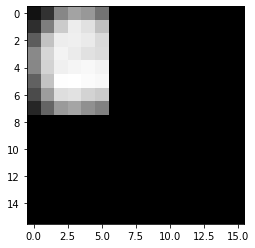

In [38]:
plt.imshow(n_np[:,:,0],cmap='gray')

In [10]:
###imresize
size = 32

ab_np = np.zeros((51,32,32,1), dtype=np.uint8)
n_np = np.zeros((51,32,32,1), dtype= np.uint8)
i = 0
for ab_whl in range(len(ab_img)):
    
    ab_im = Image.open(ab_img[ab_whl])
    n_im = Image.open(n_img[ab_whl])
    aw ,ah = ab_im.size
    nw ,nh = n_im.size
    ab_scale = size/max(aw, ah)
    n_scale = size/max(nw, nh)
    if aw > ah:
        resized1 = ab_im.resize((size, round(ah*ab_scale)), resample=Image.BILINEAR, box=None)
#         resized2 = im.resize((size, round(h*scale)), resample=Image.BILINEAR, box=None)
        
    else:
        resized1 = ab_im.resize((round(aw*ab_scale), size), resample=Image.BILINEAR, box=None)
#         resized2 = im.resize((round(w*scale), size), resample=Image.BILINEAR, box=None)
    if nw > nh:
        resized2 = n_im.resize((size, round(nh*n_scale)), resample=Image.BILINEAR, box=None)
#         resized2 = im.resize((size, round(h*scale)), resample=Image.BILINEAR, box=None)
        
    else:
        resized2 = n_im.resize((round(nw*n_scale), size), resample=Image.BILINEAR, box=None)   
        
        
    ab_array = np.array(resized1)
    n_array = np.array(resized2)
    
    ab_np[i][:resized1.size[1], :resized1.size[0],0] = ab_array
    n_np[i][:resized2.size[1], :resized2.size[0],0] = n_array
    
    i+=1
    
np.save('../test_img/32/abnormal_32_bilinear_1', ab_np)
np.save('../test_img/32/normal_32_bilinear_1', n_np)
#     plt.figure(figsize=(16,16))
#     plt.subplot(1,2,1)
#     plt.imshow(resized1, cmap='gray')
#     plt.subplot(1,2,2)
#     plt.imshow(resized2, cmap='gray')
    
    
    

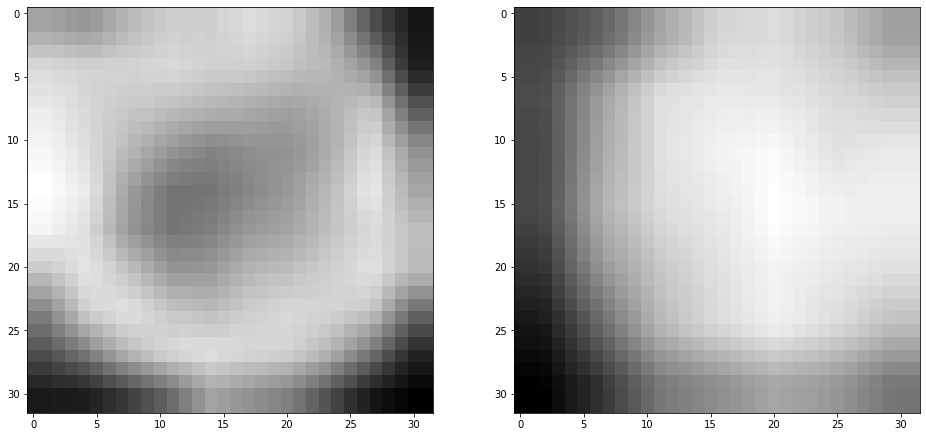

In [19]:


plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(ab_np[3,:,:,0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(n_np[3,:,:,0], cmap='gray')
plt.savefig('data_bilinear.png',dpi=200, facecolor='w', edgecolor='w')

In [16]:
train_img = np.ndarray((70, 32,32, 1), dtype=np.uint8)
test_img = np.ndarray((32,32, 32,1), dtype=np.uint8)
train_label = []
test_label= []
for lab in range(102):
    if lab< 35:
        train_label.append(0)
        train_img[lab][:,:,0] = ab_np[lab][:,:,0]
    elif lab >= 35 and lab<70:
        train_label.append(1)
        train_img[lab][:,:,0] = n_np[lab-35][:,:,0]
    elif lab >= 70 and lab <86:
        test_label.append(0)
        test_img[lab-70][:,:,0] = ab_np[lab-35][:,:,0]
    else:
        test_label.append(1)
        test_img[lab-70][:,:,0] = n_np[lab-51][:,:,0]


In [17]:
train_label=np.array(train_label)
test_label = np.array(test_label)

In [64]:
print(test_img.shape)

(32, 32, 32)


In [18]:
np.save('../train_img_32_bilinear', train_img)
np.save('../test_img_32_bilinear', test_img)
np.save('../test_label_32_bilinear', test_label)
np.save('../train_label_32_bilinear', train_label)

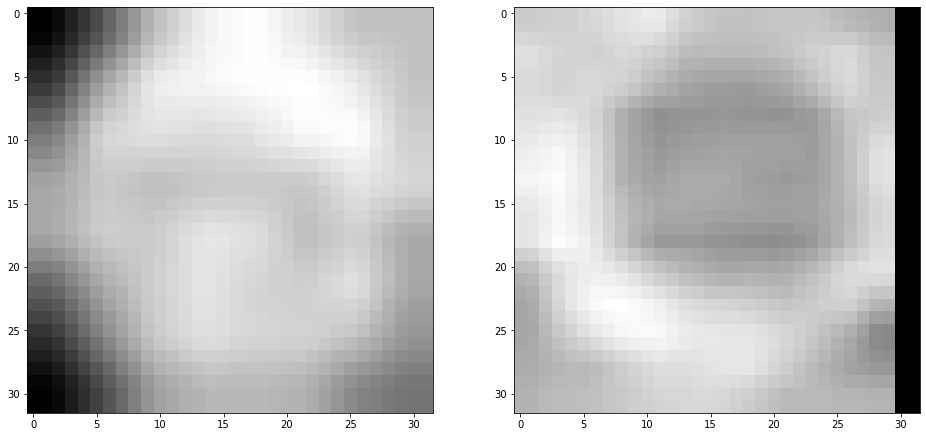

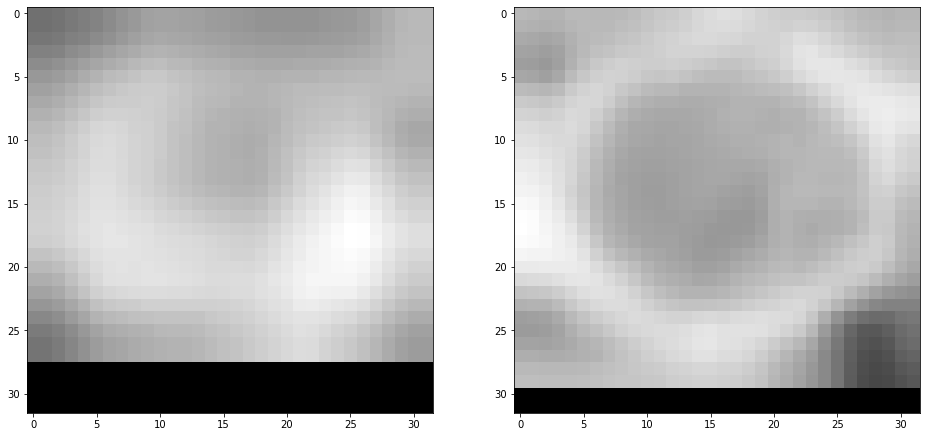

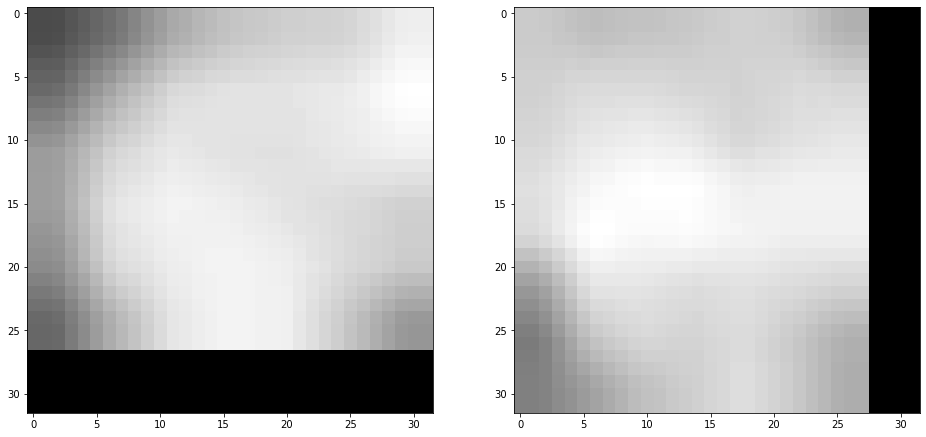

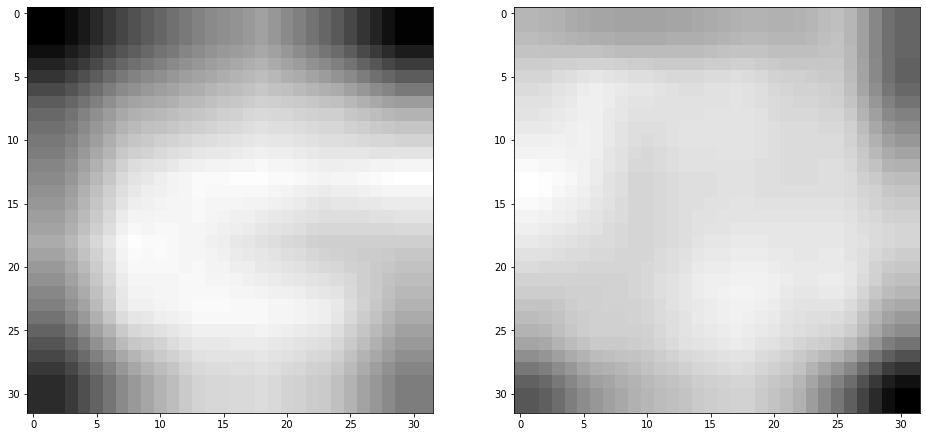

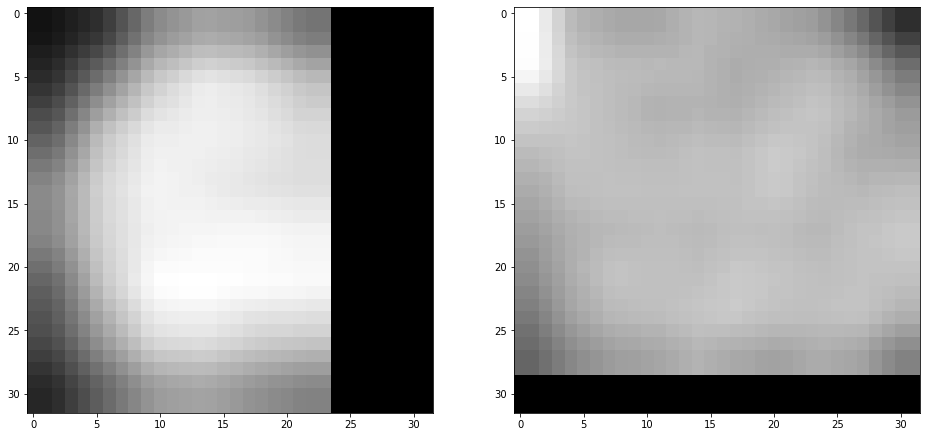

In [15]:
for tttt in range(5):
    plt.figure(figsize=(16,16))
    plt.subplot(1,2,1)
    plt.imshow(train_img[tttt+33][:,:,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(test_img[tttt+14][:,:,0], cmap='gray')